In [2]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 33.6 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
from pandas_datareader import data as web
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [14]:
stockstartdate='2021-01-01'

In [15]:
today=datetime.today().strftime('%Y-%m-%d')
today

'2021-12-19'

In [16]:
stock = yf.download("ETH-USD", start=stockstartdate, end=today, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [17]:
stock




    

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,737.708374,749.201843,719.792236,730.367554,730.367554,13652004358
2021-01-02,730.402649,786.798462,718.109497,774.534973,774.534973,19740771179
2021-01-03,774.511841,1006.565002,771.561646,975.507690,975.507690,45200463368
2021-01-04,977.058838,1153.189209,912.305359,1040.233032,1040.233032,56945985763
2021-01-05,1041.498779,1129.371460,986.811279,1100.006104,1100.006104,41535932781
...,...,...,...,...,...,...
2021-12-15,3862.251465,4086.372803,3664.719971,4018.388672,4018.388672,26411188833
2021-12-16,4020.415039,4110.368652,3956.057129,3962.469727,3962.469727,19825531254
2021-12-17,3959.012451,3992.792480,3711.424561,3879.486572,3879.486572,23143541098


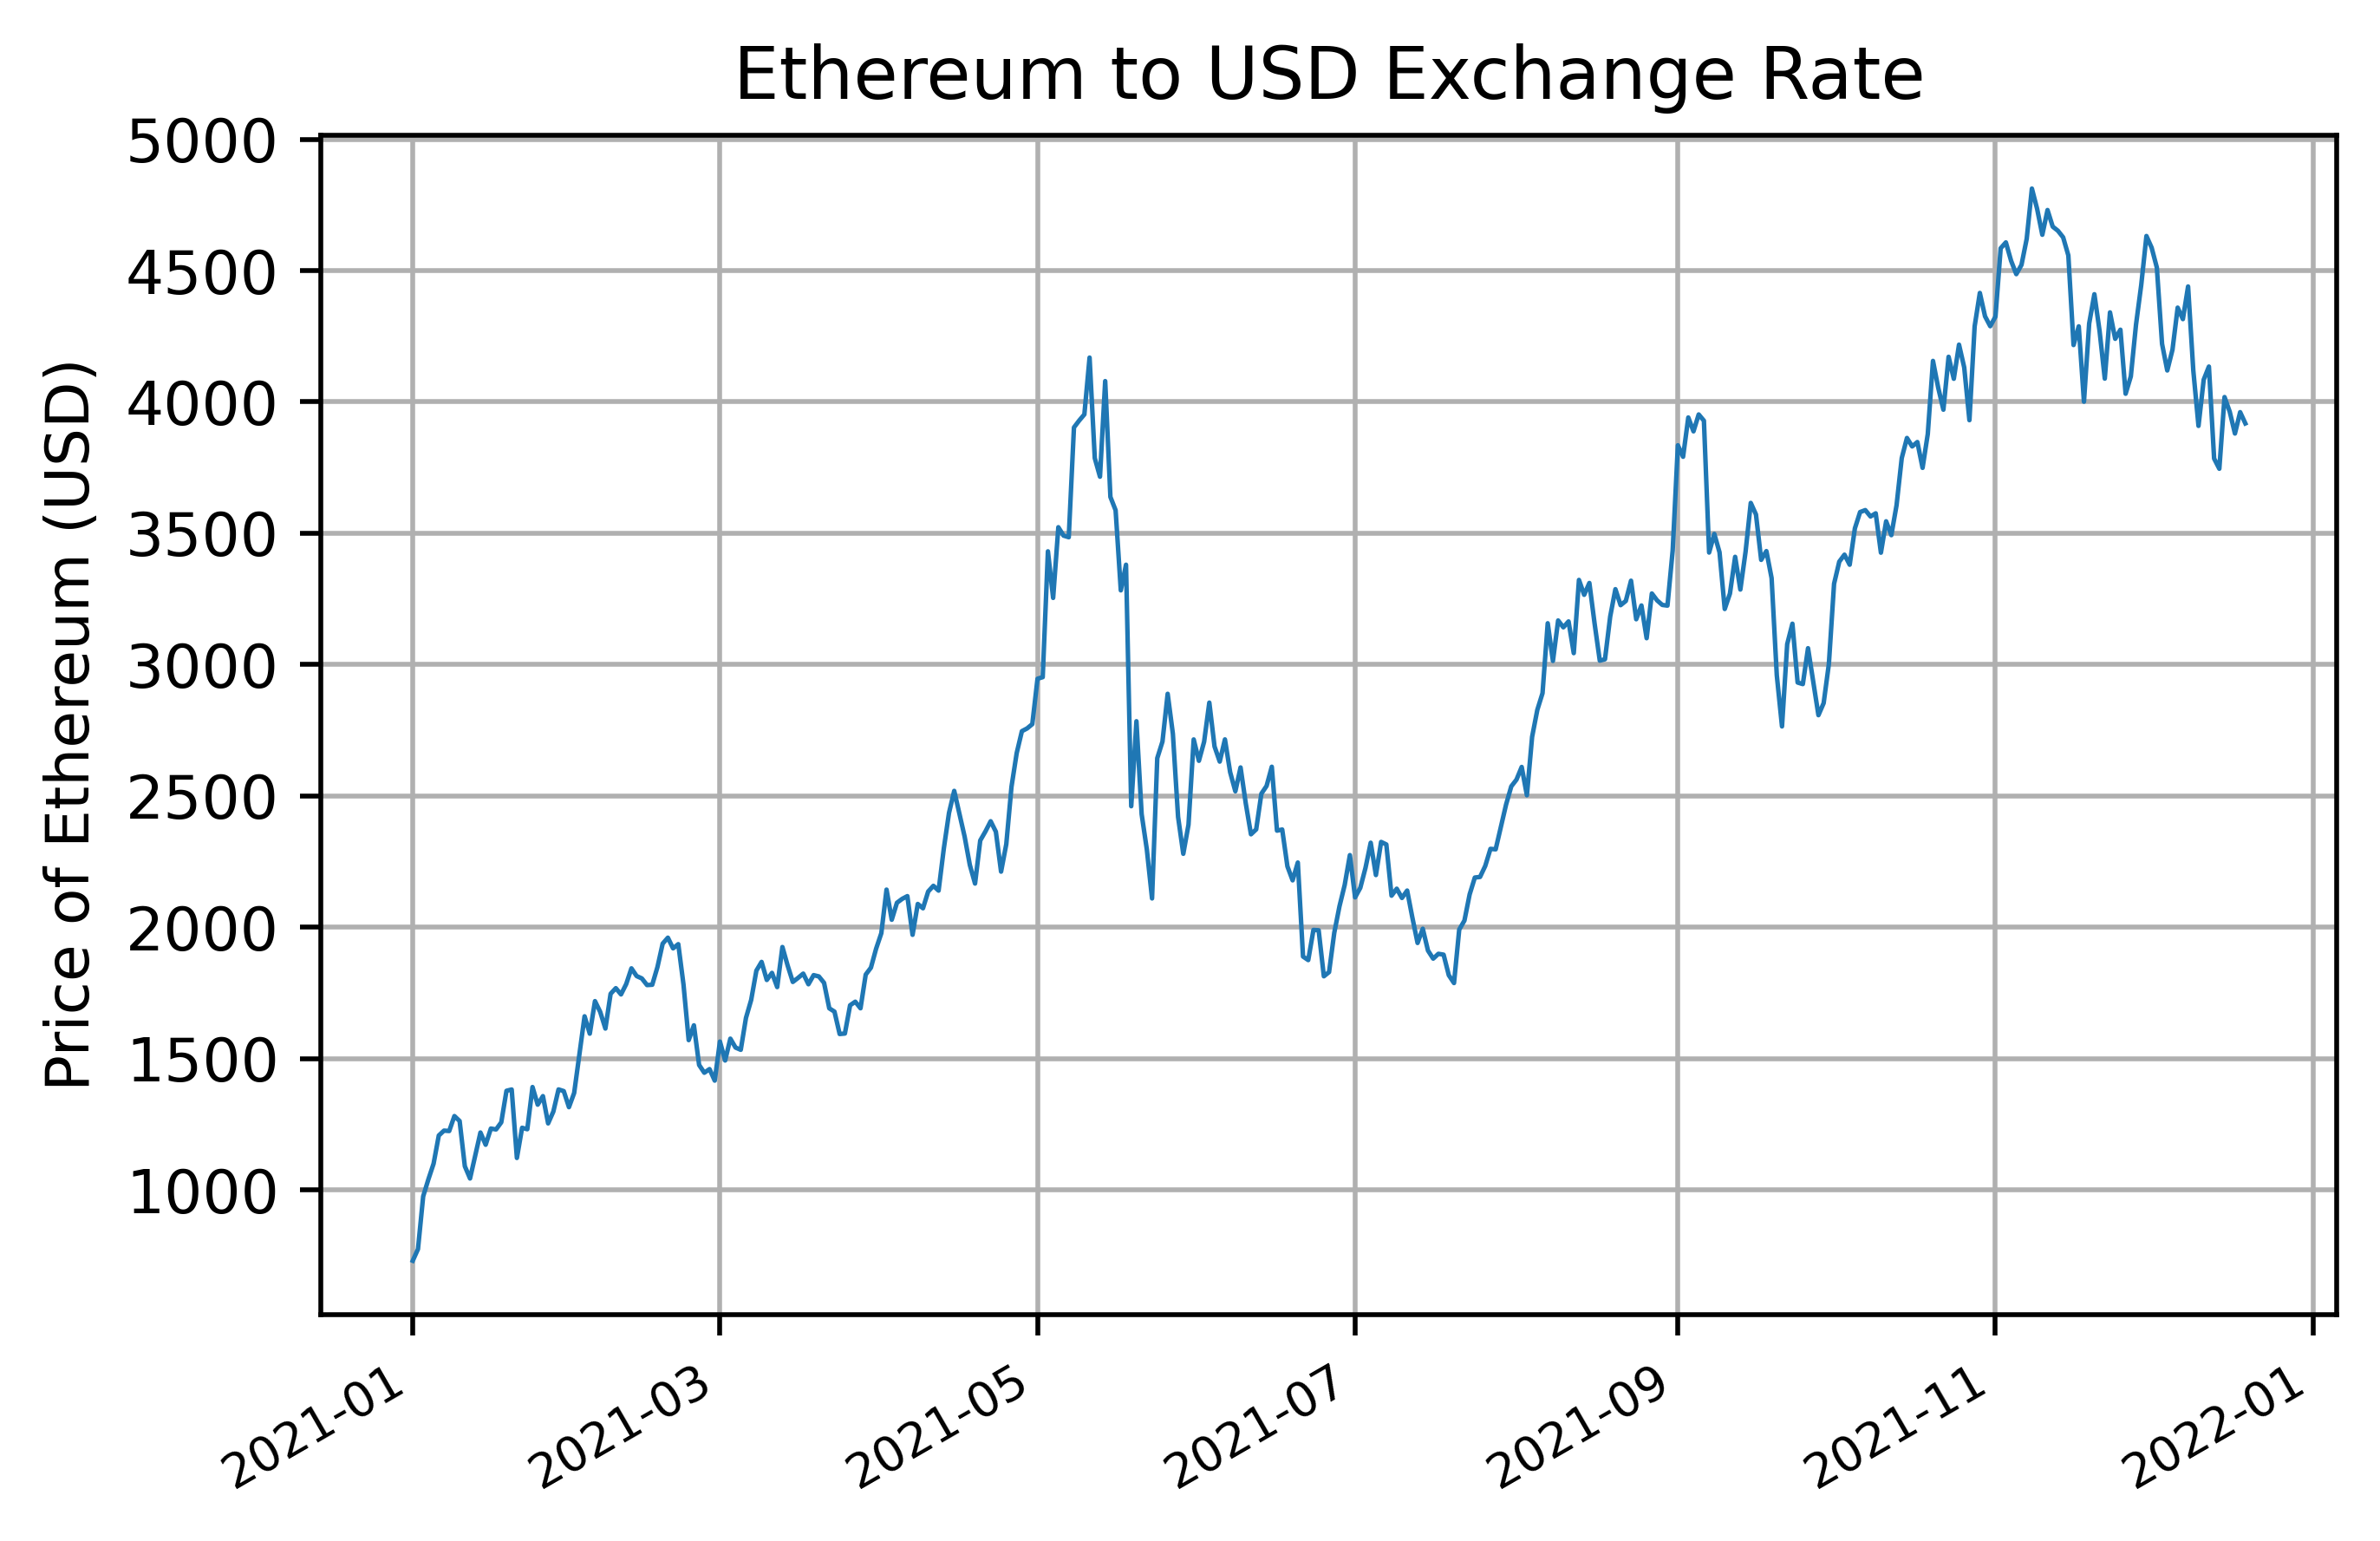

In [18]:

fig, ax = plt.subplots(dpi=500)

ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()
ax.plot(stock['Close'], lw=0.75)
ax.set_ylabel('Price of Ethereum (USD)')
ax.set_title('Ethereum to USD Exchange Rate')
ax.grid() 


In [19]:
Future_Days =7

In [21]:
stock[str(Future_Days)+'_Day_price_forecast']=stock[['Close']].shift(-Future_Days)

In [22]:
stock

,Open,High,Low,Close,Adj Close,Volume,7_Day_price_forecast
Date,,,,,,,
2021-01-01,737.708374,749.201843,719.792236,730.367554,730.367554,13652004358,1224.197144
2021-01-02,730.402649,786.798462,718.109497,774.534973,774.534973,19740771179,1281.077271
2021-01-03,774.511841,1006.565002,771.561646,975.507690,975.507690,45200463368,1262.246704
2021-01-04,977.058838,1153.189209,912.305359,1040.233032,1040.233032,56945985763,1090.145386
2021-01-05,1041.498779,1129.371460,986.811279,1100.006104,1100.006104,41535932781,1043.434570
...,...,...,...,...,...,...,...
2021-12-15,3862.251465,4086.372803,3664.719971,4018.388672,4018.388672,26411188833,NaN
2021-12-16,4020.415039,4110.368652,3956.057129,3962.469727,3962.469727,19825531254,NaN
2021-12-17,3959.012451,3992.792480,3711.424561,3879.486572,3879.486572,23143541098,NaN


In [23]:
stock[['Close',str(Future_Days)+'_Day_price_forecast']]

,Close,7_Day_price_forecast
Date,,
2021-01-01,730.367554,1224.197144
2021-01-02,774.534973,1281.077271
2021-01-03,975.507690,1262.246704
2021-01-04,1040.233032,1090.145386
2021-01-05,1100.006104,1043.434570
...,...,...
2021-12-15,4018.388672,NaN
2021-12-16,3962.469727,NaN
2021-12-17,3879.486572,NaN


In [24]:
X=np.array(stock[['Close']])
X=X[:stock.shape[0]-Future_Days]
print(X)

[[ 730.36755371]
 [ 774.53497314]
 [ 975.50769043]
 [1040.23303223]
 [1100.00610352]
 [1207.11218262]
 [1225.67810059]
 [1224.19714355]
 [1281.07727051]
 [1262.2467041 ]
 [1090.14538574]
 [1043.43457031]
 [1130.73937988]
 [1218.45300293]
 [1171.83459473]
 [1233.53759766]
 [1230.17224121]
 [1257.27954102]
 [1377.29589844]
 [1382.27404785]
 [1121.57092285]
 [1236.51220703]
 [1230.99060059]
 [1391.609375  ]
 [1324.41479492]
 [1357.05810547]
 [1253.18713379]
 [1298.10180664]
 [1382.52282715]
 [1376.11547852]
 [1314.98620605]
 [1369.04052734]
 [1515.19372559]
 [1660.9095459 ]
 [1594.76269531]
 [1718.65087891]
 [1677.84680176]
 [1614.2277832 ]
 [1746.61682129]
 [1768.03503418]
 [1744.2434082 ]
 [1783.79797363]
 [1843.53259277]
 [1814.10986328]
 [1805.08410645]
 [1779.79101562]
 [1781.06750488]
 [1848.45825195]
 [1937.44921875]
 [1960.16479492]
 [1919.53405762]
 [1935.60107422]
 [1781.99291992]
 [1570.20397949]
 [1626.57568359]
 [1475.70373535]
 [1446.03369141]
 [1459.97314453]
 [1416.0489502

In [25]:
Y=np.array(stock[str(Future_Days)+'_Day_price_forecast'])
Y=Y[:-Future_Days]
print(Y)

[1224.19714355 1281.07727051 1262.2467041  1090.14538574 1043.43457031
 1130.73937988 1218.45300293 1171.83459473 1233.53759766 1230.17224121
 1257.27954102 1377.29589844 1382.27404785 1121.57092285 1236.51220703
 1230.99060059 1391.609375   1324.41479492 1357.05810547 1253.18713379
 1298.10180664 1382.52282715 1376.11547852 1314.98620605 1369.04052734
 1515.19372559 1660.9095459  1594.76269531 1718.65087891 1677.84680176
 1614.2277832  1746.61682129 1768.03503418 1744.2434082  1783.79797363
 1843.53259277 1814.10986328 1805.08410645 1779.79101562 1781.06750488
 1848.45825195 1937.44921875 1960.16479492 1919.53405762 1935.60107422
 1781.99291992 1570.20397949 1626.57568359 1475.70373535 1446.03369141
 1459.97314453 1416.0489502  1564.7076416  1492.60876465 1575.85314941
 1541.91430664 1533.27502441 1654.74157715 1723.15380859 1834.72790527
 1868.04882812 1799.16625977 1826.19494629 1772.10241699 1924.6854248
 1854.56433105 1791.70227051 1806.97180176 1823.44934082 1782.85510254
 1817.6

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [30]:
from sklearn.svm import SVR
svr_rbf=SVR(kernel="rbf", C=1e3, gamma=0.00001)
svr_rbf.fit(x_train,y_train)

SVR(C=1000.0, gamma=1e-05)

In [32]:
svr_rbf_confidence=svr_rbf.score(x_test,y_test)
print('svr_rbf accuracy',svr_rbf_confidence)

svr_rbf accuracy 0.844639887541215


In [33]:
svm_prediction= svr_rbf.predict(x_test)
print(svm_prediction)

[2313.17429551 3589.02550944 2410.49341613 3612.16070467 4340.01219949
 2358.29574841 3533.51082333 3255.36630436 2376.32561105 2237.31873685
 3897.74888492 2256.70908812 1623.60306418 4325.88227042 1977.94716704
 2479.10807885 3849.82637873 3706.43311598 2386.38402583 2336.04706384
 4322.75801005 3017.04679523 4370.80934797 2064.84797497 1887.11724691
 4366.39319786 3295.02555769 3563.10362845 3586.21611708 2398.55434355
 3319.64324091 1910.96409225 3706.17950868 4034.86469473 3329.5866236
 1937.2731419  3437.53419702 1780.68510243 2208.20079925 1876.96517207
 2851.85116535 2005.29833285 3442.65255229 3790.734282   2282.17572541
 2245.90720378 3987.26523507 2453.27171547 2512.20707975 3244.29853716
 2876.77989897 4311.58651266 1579.76639464 4324.90222222 4218.68701939
 1454.60807346 1821.4336561  4035.34070781 3157.43280114 3580.4441796
 2374.065757   4314.00718676 3252.98756165 3283.61954274 2263.85532522
 2347.77382264 3257.41452909 3445.60528823 2378.5916391  2367.43547664]


In [34]:
print(y_test)

[1813.21728516 4087.90307617 3157.23876953 4155.9921875  4636.17431641
 2139.66479492 3877.65087891 3940.61474609 2178.49902344 2120.02636719
 4287.31884766 1895.55212402 1723.15380859 4315.06152344 2189.21875
 3167.85620117 4220.70605469 3282.39770508 2688.19506836 2315.16186523
 4287.59375    3518.51855469 4651.46044922 1446.03369141 1593.41345215
 3784.22680664 3286.93530273 3492.57324219 2784.29418945 3141.69116211
 2853.14331055 2118.37890625 3410.13452148 4084.45239258 3418.35864258
 1806.97180176 3847.10449219 1826.19494629 2198.58251953 1716.49462891
 3490.88037109 1971.07727051 2764.43115234 4274.74316406 1829.23925781
 2466.96142578 4119.58740234 2537.89111328 2372.484375   3834.828125
 2807.29663086 4409.93115234 1314.98620605 4030.90893555 4340.76367188
 1369.04052734 2143.22558594 3962.46972656 2471.51855469 4171.66357422
 2746.38012695 4537.32421875 3100.32543945 3242.11547852 2146.69238281
 2502.34960938 3433.73266602 3952.29394531 2827.32885742 2211.62573242]


<function matplotlib.pyplot.show>

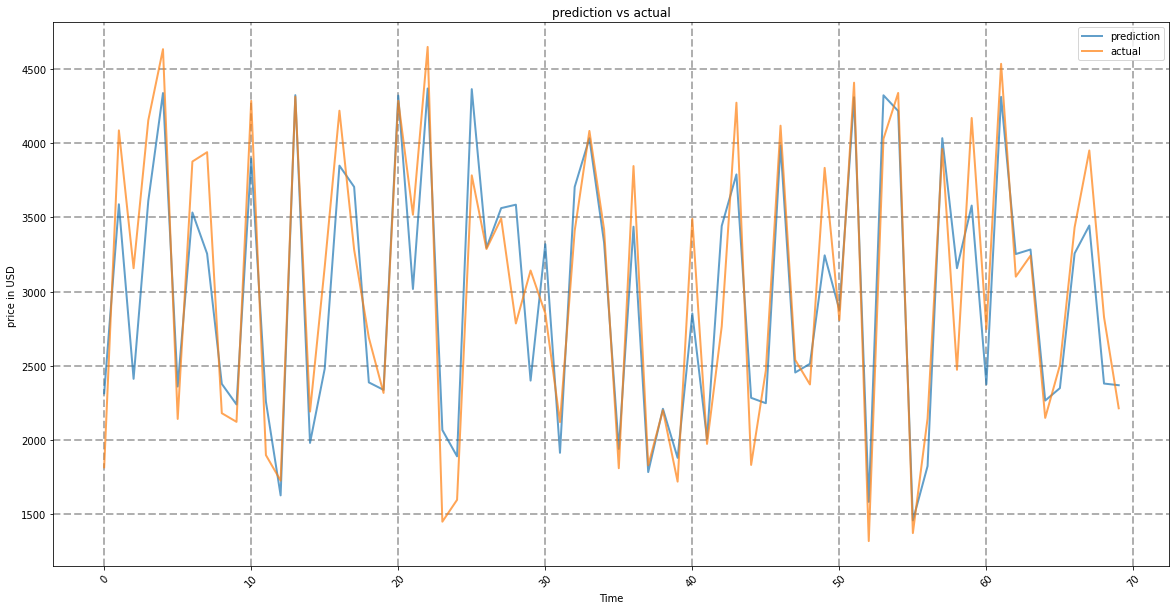

In [49]:
plt.figure(figsize=(20,10))
plt.plot(svm_prediction,label='prediction',lw=2,alpha=.7)
plt.plot(y_test,label='actual',lw=2,alpha=.7)
plt.title('prediction vs actual')
plt.ylabel('price in USD ')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(linestyle='--', linewidth=2)
plt.show
